# Central Limit Theorem experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Define inverse of cumulative distribution

In [3]:
# Cumulative distribution function for Cauchy distribution is
#
#   F(x) =  np.arctan(x)/np.pi + 0.5
#

def invF(u):
    x = np.tan(np.pi*(u-0.5))
    return x
    
# invF = np.frompyfunc(invF, 1, 1)

### (3) Generate a set of random variables from given distribution

In [4]:
# Number of generations

Nmc = 1000

u_tab = np.random.uniform(size=Nmc)

x_tab = invF(u_tab)


### (4) Plot results

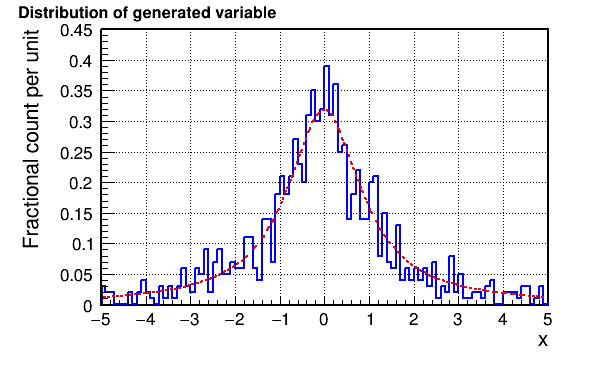

Info in <TCanvas::Print>: png file generation_1000.png has been created


In [5]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Create result histogram

Xmax=5.
Nbin = 100
dX=2.*Xmax/Nbin

hexp = TH1D('hexp','Distribution of generated variable',Nbin, -Xmax, Xmax)

# Fill histogram

w = 1./dX/Nmc

for itry in range(Nmc):
    hexp.Fill(x_tab[itry],w)

# Axis description

hexp.GetXaxis().SetTitle("x")
hexp.GetYaxis().SetTitle("Fractional count per unit")

# Show histogram statistics

hexp.SetStats(0)

# Plot style

hexp.SetMarkerStyle(20)
hexp.SetMaximum(0.45)
hexp.SetMinimum(0.)
hexp.DrawCopy('HIST')

# Expected dependence

def myCauchy(x, par):
    norm = par[0]/np.pi
    val = 1./(x[0]**2 + par[0]**2)
    return norm*val

# Define user function

fexp=TF1("fexp",myCauchy,-Xmax,Xmax,1)
fexp.SetParameter(0,1.)
fexp.SetNpx(100)
fexp.SetTitle("Cauchy distribution")
fexp.SetLineStyle(2)
fexp.SetLineColor(2)
fexp.DrawCopy("Lsame")

cexp.Update()
fname = 'generation_'+str(Nmc)+'.png'
cexp.Print(fname)

Image(filename=fname)